<a href="https://colab.research.google.com/github/rileygoetz/DS1002-S24/blob/main/Assignments%209/Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Name                    Computing ID

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [3]:
import numpy as np
import pandas as pd
data = pd.read_csv('data.csv')


## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [4]:
file_path = 'data.csv'

data = pd.read_csv(file_path, delimiter=';')

print(data.shape)


(741, 11)


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [5]:
data_cleaned = data.drop_duplicates()

data_cleaned = data_cleaned.sort_values(by='timestamp')

columns_to_drop = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap']
data_cleaned = data_cleaned.drop(columns=columns_to_drop)

cleaned_file_path = 'path_to_your_cleaned_file.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

Now display the first 10 rows of the cleaned dataset.

In [6]:
data_cleaned.head(10)


,open,high,low,close,volume,timestamp
739,6.201133,7.007523,6.171834,6.923968,3.104665e+07,2021-01-03T23:59:59.999Z
738,6.948680,7.632146,6.358218,7.514079,4.052611e+07,2021-01-04T23:59:59.999Z
737,7.528216,8.714947,7.081120,8.664688,4.947928e+07,2021-01-05T23:59:59.999Z
736,8.671285,9.390797,8.425946,9.390797,3.140463e+07,2021-01-06T23:59:59.999Z
735,9.386493,10.004872,9.215244,9.562131,4.630334e+07,2021-01-07T23:59:59.999Z
734,9.569239,9.726429,8.452265,9.380988,4.228627e+07,2021-01-08T23:59:59.999Z
733,9.370450,9.636120,8.728044,9.570511,2.849895e+07,2021-01-09T23:59:59.999Z
732,9.571917,9.944797,8.657147,9.308809,3.101239e+07,2021-01-10T23:59:59.999Z
731,9.298315,9.298315,7.126050,8.610997,1.013024e+08,2021-01-11T23:59:59.999Z
730,8.615143,9.097479,8.040916,8.381133,2.674536e+07,2021-01-12T23:59:59.999Z


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [7]:
data_cleaned['close_change'] = data_cleaned['close'].diff()

print(data_cleaned.head(10))

         open       high       low     close        volume  \
739  6.201133   7.007523  6.171834  6.923968  3.104665e+07   
738  6.948680   7.632146  6.358218  7.514079  4.052611e+07   
737  7.528216   8.714947  7.081120  8.664688  4.947928e+07   
736  8.671285   9.390797  8.425946  9.390797  3.140463e+07   
735  9.386493  10.004872  9.215244  9.562131  4.630334e+07   
734  9.569239   9.726429  8.452265  9.380988  4.228627e+07   
733  9.370450   9.636120  8.728044  9.570511  2.849895e+07   
732  9.571917   9.944797  8.657147  9.308809  3.101239e+07   
731  9.298315   9.298315  7.126050  8.610997  1.013024e+08   
730  8.615143   9.097479  8.040916  8.381133  2.674536e+07   

                    timestamp  close_change  
739  2021-01-03T23:59:59.999Z           NaN  
738  2021-01-04T23:59:59.999Z      0.590111  
737  2021-01-05T23:59:59.999Z      1.150608  
736  2021-01-06T23:59:59.999Z      0.726110  
735  2021-01-07T23:59:59.999Z      0.171334  
734  2021-01-08T23:59:59.999Z     -0.1811

## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [8]:
top_10_growth_days = data_cleaned.sort_values(by='close_change', ascending=False).head(10)

top_10_growth_days = top_10_growth_days[['timestamp', 'close_change']]
print(top_10_growth_days)

                    timestamp  close_change
492  2021-09-01T23:59:59.999Z     16.677156
487  2021-09-06T23:59:59.999Z      9.800320
692  2021-02-19T23:59:59.999Z      8.335900
592  2021-05-24T23:59:59.999Z      6.333923
673  2021-03-09T23:59:59.999Z      5.529699
515  2021-08-09T23:59:59.999Z      5.325192
485  2021-09-08T23:59:59.999Z      5.239728
625  2021-04-26T23:59:59.999Z      4.504385
611  2021-05-05T23:59:59.999Z      4.488174
311  2022-02-28T23:59:59.999Z      4.401841


## 6. Calculate the Percentage Rate of Change



```

```

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [9]:
data_cleaned['rate_of_change'] = data_cleaned['close_change'] / data_cleaned['close'].shift(1)

print(data_cleaned.head(10))

         open       high       low     close        volume  \
739  6.201133   7.007523  6.171834  6.923968  3.104665e+07   
738  6.948680   7.632146  6.358218  7.514079  4.052611e+07   
737  7.528216   8.714947  7.081120  8.664688  4.947928e+07   
736  8.671285   9.390797  8.425946  9.390797  3.140463e+07   
735  9.386493  10.004872  9.215244  9.562131  4.630334e+07   
734  9.569239   9.726429  8.452265  9.380988  4.228627e+07   
733  9.370450   9.636120  8.728044  9.570511  2.849895e+07   
732  9.571917   9.944797  8.657147  9.308809  3.101239e+07   
731  9.298315   9.298315  7.126050  8.610997  1.013024e+08   
730  8.615143   9.097479  8.040916  8.381133  2.674536e+07   

                    timestamp  close_change  rate_of_change  
739  2021-01-03T23:59:59.999Z           NaN             NaN  
738  2021-01-04T23:59:59.999Z      0.590111        0.085227  
737  2021-01-05T23:59:59.999Z      1.150608        0.153127  
736  2021-01-06T23:59:59.999Z      0.726110        0.083801  
735  20

## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [10]:
top_5_positive_rate_change = data_cleaned.sort_values(by='rate_of_change', ascending=False).head(5)

top_5_negative_rate_change = data_cleaned.sort_values(by='rate_of_change').head(5)

top_rate_changes = pd.concat([top_5_positive_rate_change, top_5_negative_rate_change], keys=['Positive', 'Negative'])

top_rate_changes = top_rate_changes[['timestamp', 'rate_of_change']]
print(top_rate_changes)

                             timestamp  rate_of_change
Positive 53   2022-11-10T23:59:59.999Z        0.528686
         492  2021-09-01T23:59:59.999Z        0.343825
         692  2021-02-19T23:59:59.999Z        0.317665
         24   2022-12-09T23:59:59.999Z        0.246848
         48   2022-11-15T23:59:59.999Z        0.244886
Negative 55   2022-11-08T23:59:59.999Z       -0.750752
         54   2022-11-09T23:59:59.999Z       -0.583137
         50   2022-11-13T23:59:59.999Z       -0.287059
         597  2021-05-19T23:59:59.999Z       -0.275101
         52   2022-11-11T23:59:59.999Z       -0.263444


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

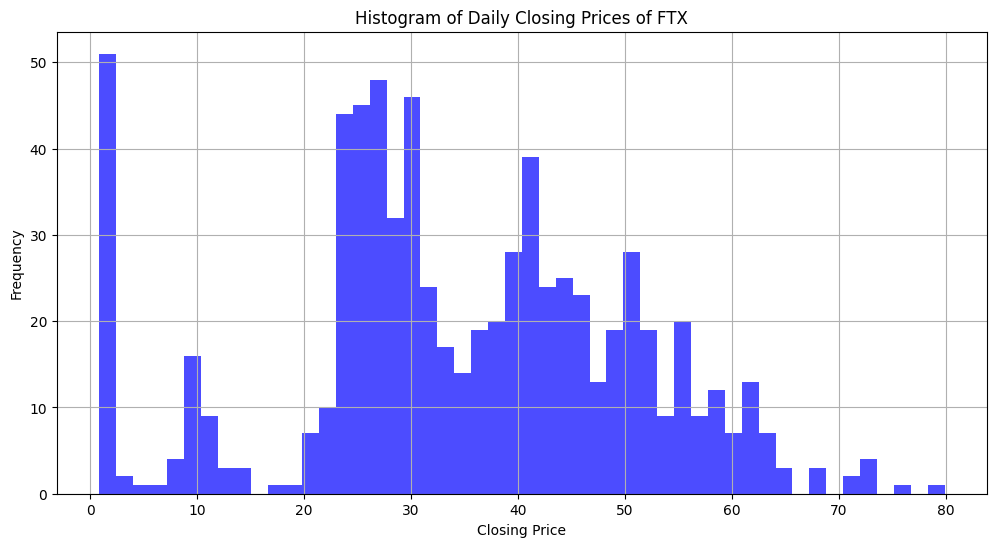

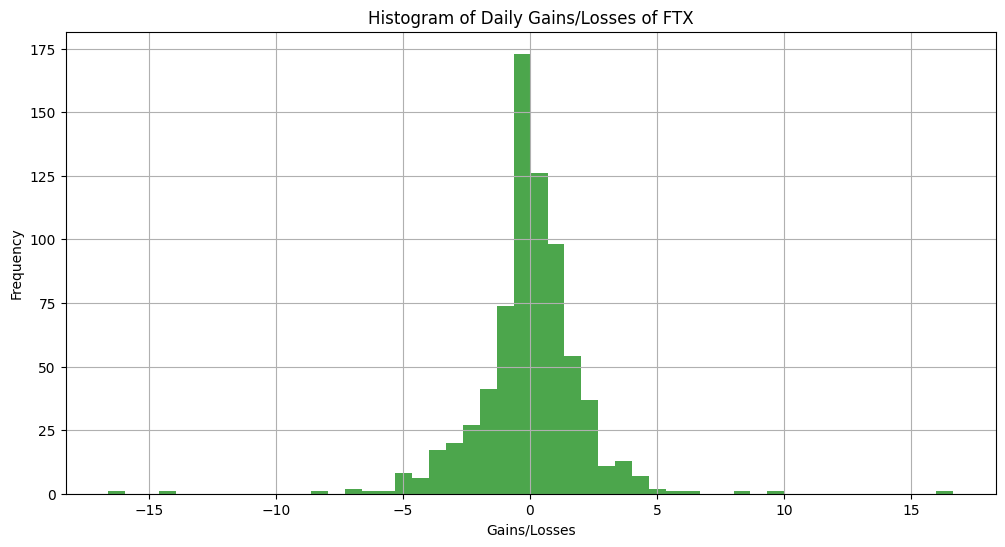

In [11]:
import matplotlib.pyplot as plt

# Histogram for daily closing price
plt.figure(figsize=(12, 6))
plt.hist(data_cleaned['close'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Daily Closing Prices of FTX')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram for daily gains/losses
plt.figure(figsize=(12, 6))
plt.hist(data_cleaned['close_change'].dropna(), bins=50, color='green', alpha=0.7)  # Dropping NaN values for plotting
plt.title('Histogram of Daily Gains/Losses of FTX')
plt.xlabel('Gains/Losses')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

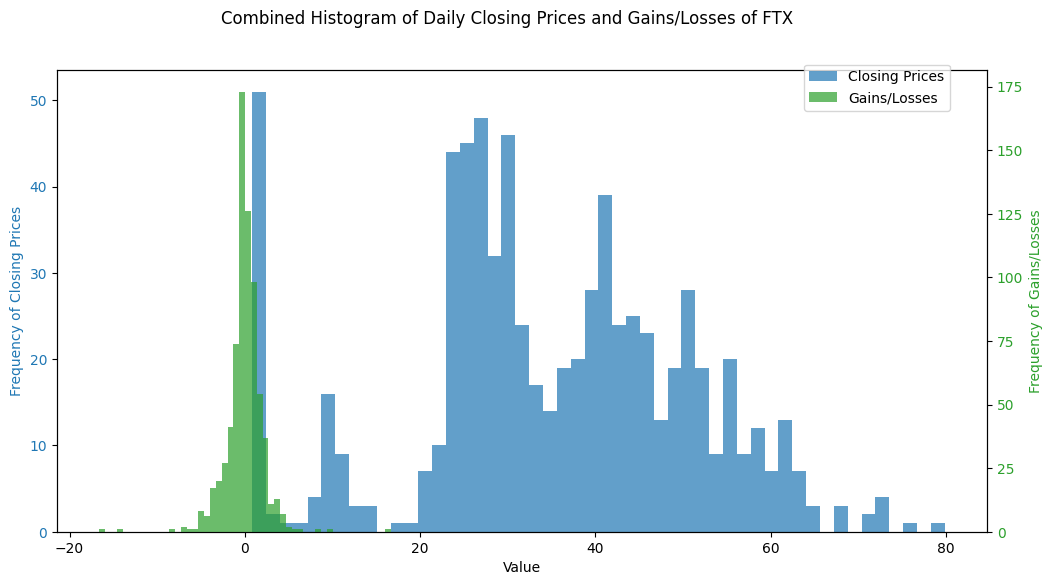

In [12]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency of Closing Prices', color=color)
ax1.hist(data_cleaned['close'], bins=50, color=color, alpha=0.7, label='Closing Prices')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Frequency of Gains/Losses', color=color)
ax2.hist(data_cleaned['close_change'].dropna(), bins=50, color=color, alpha=0.7, label='Gains/Losses')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Combined Histogram of Daily Closing Prices and Gains/Losses of FTX')
fig.legend(loc='upper right', bbox_to_anchor=(0.875, 0.9))

plt.show()
